In [1]:
import numpy as np
import tensorflow as tf
import os
from PIL import Image
import random

from keras.utils import np_utils
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Flatten, Dense, MaxPooling2D
from keras.layers import BatchNormalization

Using TensorFlow backend.


# Set dimension image

In [ ]:
# set dimension image input (width, hieght)
img_row , img_col = 128, 128
dimension_name_path = str(img_row)

In [ ]:
# TB image path
tb_path = 'D:\CU\Thesis\CNN model\TB'
# Input image
image_path = 'D:\\CU\\Thesis\\CNN model\\' + 'input_data_128_2'

#shuffle 5 bin without monto
# image_path = 'D:\\CU\\Thesis\\CNN model\\' + 'input_data_shuffle'

#shuffle 3 bin with monto
# image_path = '.\\input_data_shuffle_3cat'

# Create image array, dimension is img_row*img_col (gray)

In [2]:
def create_list(image_path):
#create list keep [image,label] receive 2 argument 1. path of all image
    im_matrix = []
    imlist = os.listdir(image_path)
    num_samples = np.size(imlist)
    n = 0
    run = 0
    for file in imlist:
        n = n+1
        im = Image.open(image_path + '\\' + file)
        im2 = np.array(im).flatten()
        im_matrix.append(im2)
        run = n/len(imlist) * 100
        print('Creating image array, processing %.2f' %(run) + '%', end ='\r')

    im_matrix = np.array(im_matrix, dtype = 'f')
    print('Creating image array, processing %.2f' %(run) + '%')

    label = np.ones((num_samples,),dtype = int)
    label[0:num_samples] = 0
    for i in range(len(imlist)):
        if imlist[i][0] == 't':
            label[i] = 1

    train_data = [im_matrix, label]
    print(train_data[0].shape)
    print(train_data[1].shape)
    return train_data


In [ ]:
#Create array >>> ([image,label], ...)
train_data = create_list(image_path)

# Data Preporcessing

In [ ]:
# batch_size to train
batch_size = 128
# number of output classes
nb_classes = 2
# number of epochs to train
nb_epoch = 100
# number of channels
img_channel = 1


print("already set parameter")

In [ ]:
(X, y) = (train_data[0],train_data[1])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

#Convert 0-255 to 0-1
x_train = x_train/255.0
x_test =  x_test/255.0

#One hot encoding
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

#x_train = x_train.reshape(x_train.shape[0],img_row, img_col, 1)
#x_test = x_test.reshape(x_test.shape[0],img_row, img_col, 1)

x_train = x_train.reshape(x_train.shape[0], img_row, img_col, 1)
x_test = x_test.reshape(x_test.shape[0],img_row, img_col, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("already split train and test data")


In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
#label [1:0] is normal, label [0:1] is tb
data_label = ['normal', 'tuberculosis']
def check_label(array_label, index_label, data_label):
    # receive array shape size (number of data, number of label)
    label = array_label[index_label]
    for i in range(len(label)):
        if label[i] == 1:
            return data_label[i]


In [ ]:
# check label (if same index = correct)
for index_label in range(y_test.shape[0]):
    print(check_label(y_test, index_label, data_label), index_label)

In [ ]:
# print image for check input data before training

# x_train = np.rollaxis(x_train, 1, 4)
x_test = np.rollaxis(x_test, 3, 1)
index_label = 2
plt.imshow(x_test[index_label,0], interpolation = 'nearest')
plt.show()
print("label :", check_label(y_test, index_label, data_label))


# Create AlexNet

In [3]:
from keras import optimizers
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.core import Activation

In [4]:
#  Create AlexNet
def AlexNet():
    #Clear variable
    tf.reset_default_graph()
    
    model = Sequential()
    # for original Alexnet
   # Layer 1
#     model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='same', 
#                         input_shape=(img_height, img_width, channel,)))
    
    model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='same', 
                     input_shape=(img_row, img_col, 1), data_format = 'channels_last'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Layer 2
    model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Layer 3
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 4
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(1024, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Layer 5
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(1024, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 6
    model.add(Flatten())
    model.add(Dense(2048))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # Layer 7
    model.add(Dense(2048))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # Layer 8
    model.add(Dense(nb_classes))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #Set Optimizer for backpropagation
#     adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
#     model.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])
    
    sgd = optimizers.SGD(lr=0.05, decay=0.0001, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    model.summary()
    return model


In [ ]:
model = AlexNet()

# Train CNN Model

In [ ]:
from keras import callbacks

# Callbacks
result_path = './result_alexnet/'
log = callbacks.CSVLogger(result_path + '/training_log.csv')
tb = callbacks.TensorBoard(log_dir=result_path + '/tensorboard-logs',
                           batch_size=batch_size, histogram_freq=0)
checkpoint = callbacks.ModelCheckpoint(result_path + '/weights-{epoch:02d}.h5', monitor='val_acc',
                                       save_best_only=True, save_weights_only=True, verbose=1)
# lr_decay = callbacks.LearningRateScheduler(schedule=lambda epoch: args.lr * (args.lr_decay ** epoch))
print('set callbacks')

In [ ]:
# set epoch
nb_epoch = 300
batch_size = 128

In [ ]:
train = model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=batch_size, epochs=nb_epoch, 
                  callbacks=[log, tb, checkpoint])
print('training complete')

In [ ]:
# save model
model.save_weights(result_path + '/trained_model.h5')
print('Trained model saved to \'%s/trained_model.h5\'' % result_path)

In [ ]:
# Show Model Accuracy on Train and Valiadtion Data
plt.plot(train.history['acc'],color='steelblue')
plt.plot(train.history['val_acc'],color='sandybrown')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# Evaluation

In [ ]:
# Accuracy on Test Data
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
results = model.predict(x_test)

In [ ]:
data_label = ['normal', 'tuberculosis']
def convert_to_label(data):
    max_prob = max(data)
    for i,prob in enumerate(data):
        if prob == max_prob:
            class_index = i
          
    class_label = data_label[class_index]
    return class_label

def image_show(x_test, input_y_test, index):
    pass


def show_test_result(i):
    return "Prediction :" + convert_to_label(results[i])
    #image_show(x_test,input_y_test,i)
    

In [ ]:
for i in range(results.shape[0]):
    print(show_test_result(i), "Actual :", convert_to_label(y_test[i]), i)

In [ ]:
# recall
sum_tb_recall = 0
total = y_test.shape[0]
sum_tb_correct = 0
for i in range(results.shape[0]):
    if convert_to_label(y_test[i]) == 'tuberculosis':
        sum_tb_recall += 1
        if convert_to_label(results[i]) == convert_to_label(y_test[i]):
              sum_tb_correct += 1
        print(show_test_result(i), "Actual :", convert_to_label(y_test[i]), i)
#     print(show_test_result(i), "Actual :", convert_to_label(y_test[i]), i)


print('recall : %.2f%%' %((sum_tb_correct/sum_tb_recall)*100))

In [ ]:
# specificity
sum_tb_specificity = 0
total = y_test.shape[0]
sum_n_correct = 0
for i in range(results.shape[0]):
    if convert_to_label(y_test[i]) == 'normal':
        sum_tb_specificity += 1
        if convert_to_label(results[i]) == convert_to_label(y_test[i]):
              sum_n_correct += 1
        print(show_test_result(i), "Actual :", convert_to_label(y_test[i]), i)
#     print(show_test_result(i), "Actual :", convert_to_label(y_test[i]), i)


print('specificity : %.2f%%' %((sum_n_correct/sum_tb_specificity)*100))

In [ ]:
i = 3
plt.imshow(x_test[i,0], interpolation = 'nearest')
plt.show()
print(show_test_result(i), "Actual :", convert_to_label(y_test[i]))

In [ ]:
input_test_data = create_list(image_path, tb_path)

In [ ]:
data = input_test_data[0].reshape(input_test_data[0].shape[0], 1, img_row, img_col)

In [ ]:
prediction_result = model.predict(data)

# Predict affine image

In [5]:
# img_row , img_col = 28, 28
img_row , img_col = 128, 128
# img_row , img_col = 64, 64
# img_row , img_col = 32, 32

In [6]:
#shuffle  
# image_path = './train_aff_64_1/'
# image_path = './train_aff_64_2/'
# image_path = './train_aff_28_3/'
# image_path = './train_aff_28_4/'
# image_path = './train_aff_28_5/'
image_path = './train/train_32_-10t10_5296/'
# image_path = './train/train_32_-10t10_6620/'

#affine
# affine_path = './affine_image_128/'
# affine_path = './affine_128_4/'
# affine_path = './affine_28_1/'
# affine_path = './test_aff_28_1/'
# affine_path = './test_aff_28_2/'
# affine_path = './test_aff_64_1/'
# affine_path = './test_aff_64_2/'
# affine_path = './test_aff_28_3/'
# affine_path = './test_aff_28_31/'
# affine_path = './test_aff_28_4/'
# affine_path = './test_aff_28_5/'
affine_path = './test/test_aff_32_-10t10_662/'
# affine_path = './test/test_aff_32_-30t30_662/'

#test no affine
# affine_path = './test_noaff_28/'


In [7]:
train_data_aff = create_list(image_path)

Creating image array, processing 100.00%
(5296, 1024)
(5296,)


In [8]:
predict_data = create_list(affine_path)

Creating image array, processing 100.00%
(662, 1024)
(662,)


In [10]:
# Data Preporcessing

# batch_size to train
batch_size = 128
# number of output classes
nb_classes = 2
# number of epochs to train
nb_epoch = 50
# number of channels
img_channel = 1

print("already set parameter")

already set parameter


In [ ]:
#split train 80  val 20 test 20

(X, y) = (train_data_aff[0],train_data_aff[1])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

#Convert 0-255 to 0-1
x_train = x_train/255.0
x_test =  x_test/255.0

#One hot encoding
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

x_train = x_train.reshape(x_train.shape[0],img_row, img_col, 1)
x_test = x_test.reshape(x_test.shape[0],img_row, img_col, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("already split train and test data")

In [11]:
#train 100 test 20

(x_train, y_train) = (train_data_aff[0],train_data_aff[1])
print('train shape:', x_train.shape, 'train label shape:', y_train.shape)

(x_test, y_test) = (predict_data[0],predict_data[1])
print('test shape:', x_test.shape, 'test label shape:', y_test.shape)

#Convert 0-255 to 0-1
x_train = x_train/255.0
x_test =  x_test/255.0

#One hot encoding
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

x_train = x_train.reshape(x_train.shape[0],img_row, img_col, 1)
x_test = x_test.reshape(x_test.shape[0],img_row, img_col, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("already split train and test data")

train shape: (5296, 1024) train label shape: (5296,)
test shape: (662, 1024) test label shape: (662,)
already split train and test data


In [12]:
from keras import callbacks

# Callbacks
result_path = './result_alexnet/'
log = callbacks.CSVLogger(result_path + '/training_log.csv')
tb = callbacks.TensorBoard(log_dir=result_path + '/tensorboard-logs',
                           batch_size=batch_size, histogram_freq=0)
checkpoint = callbacks.ModelCheckpoint(result_path + '/weights-{epoch:02d}.h5', monitor='val_acc',
                                       save_best_only=True, save_weights_only=True, verbose=1)
# lr_decay = callbacks.LearningRateScheduler(schedule=lambda epoch: args.lr * (args.lr_decay ** epoch))
print('set callbacks')

set callbacks


In [13]:
model = AlexNet()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 96)          11712     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 4, 4, 256)         0         
__________

In [14]:
# set epoch
nb_epoch = 200
batch_size = 128

In [15]:
train = model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=batch_size, epochs=nb_epoch, 
                  callbacks=[log, tb, checkpoint])
print('training complete')

Train on 5296 samples, validate on 662 samples
Epoch 1/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.6311 - acc: 0.6576
Epoch 00001: val_acc improved from -inf to 0.57704, saving model to ./result_alexnet//weights-01.h5
5296/5296 [==============================] - 7s 1ms/step - loss: 0.6309 - acc: 0.6584 - val_loss: 0.8574 - val_acc: 0.5770
Epoch 2/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.5399 - acc: 0.7245
Epoch 00002: val_acc did not improve
5296/5296 [==============================] - 3s 556us/step - loss: 0.5398 - acc: 0.7243 - val_loss: 1.0565 - val_acc: 0.5514
Epoch 3/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.5093 - acc: 0.7593
Epoch 00003: val_acc improved from 0.57704 to 0.62236, saving model to ./result_alexnet//weights-03.h5
5296/5296 [==============================] - 4s 721us/step - loss: 0.5094 - acc: 0.7593 - val_loss: 0.7111 - val_acc: 0.6224
Epoch 4/300
5248/5296 [============================>.] - E

Epoch 31/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9678
Epoch 00031: val_acc did not improve
5296/5296 [==============================] - 3s 560us/step - loss: 0.1058 - acc: 0.9677 - val_loss: 0.8834 - val_acc: 0.6873
Epoch 32/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0898 - acc: 0.9748
Epoch 00032: val_acc did not improve
5296/5296 [==============================] - 3s 553us/step - loss: 0.0897 - acc: 0.9749 - val_loss: 0.9023 - val_acc: 0.6888
Epoch 33/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0925 - acc: 0.9729- ETA: 0s - loss: 0.0891 - a
Epoch 00033: val_acc did not improve
5296/5296 [==============================] - 3s 555us/step - loss: 0.0928 - acc: 0.9728 - val_loss: 1.0239 - val_acc: 0.6541
Epoch 34/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0969 - acc: 0.9701- ETA: 2s - loss - ETA: 0s - loss: 0.1020 - 
Epoch 00034: val_acc did not improve
5296/5296 [==============

Epoch 61/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0094 - acc: 1.0000
Epoch 00061: val_acc improved from 0.88822 to 0.88973, saving model to ./result_alexnet//weights-61.h5
5296/5296 [==============================] - 4s 674us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 0.3747 - val_acc: 0.8897
Epoch 62/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0090 - acc: 1.0000
Epoch 00062: val_acc did not improve
5296/5296 [==============================] - 3s 569us/step - loss: 0.0090 - acc: 1.0000 - val_loss: 0.3886 - val_acc: 0.8837
Epoch 63/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0086 - acc: 1.0000
Epoch 00063: val_acc did not improve
5296/5296 [==============================] - 3s 553us/step - loss: 0.0087 - acc: 1.0000 - val_loss: 0.3742 - val_acc: 0.8731
Epoch 64/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0092 - acc: 1.0000
Epoch 00064: val_acc did not improve
5296/5296 [====================

Epoch 122/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0038 - acc: 1.0000
Epoch 00122: val_acc did not improve
5296/5296 [==============================] - 3s 545us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.3899 - val_acc: 0.8912
Epoch 123/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0038 - acc: 1.0000- ETA: 1s - loss: 0.0
Epoch 00123: val_acc did not improve
5296/5296 [==============================] - 3s 548us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.4766 - val_acc: 0.8746
Epoch 124/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0036 - acc: 1.0000
Epoch 00124: val_acc did not improve
5296/5296 [==============================] - 3s 548us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.3695 - val_acc: 0.8927
Epoch 125/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0037 - acc: 1.0000
Epoch 00125: val_acc did not improve
5296/5296 [==============================] - 3s 545us/step - loss: 0.003

Epoch 184/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0892 - acc: 0.9691
Epoch 00184: val_acc did not improve
5296/5296 [==============================] - 3s 553us/step - loss: 0.0891 - acc: 0.9692 - val_loss: 3.8289 - val_acc: 0.5181
Epoch 185/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0252 - acc: 0.9924
Epoch 00185: val_acc did not improve
5296/5296 [==============================] - 3s 546us/step - loss: 0.0250 - acc: 0.9924 - val_loss: 0.4420 - val_acc: 0.8671
Epoch 186/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0069 - acc: 0.9998
Epoch 00186: val_acc did not improve
5296/5296 [==============================] - 3s 557us/step - loss: 0.0068 - acc: 0.9998 - val_loss: 0.6821 - val_acc: 0.7900
Epoch 187/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0047 - acc: 1.0000
Epoch 00187: val_acc did not improve
5296/5296 [==============================] - 3s 556us/step - loss: 0.0048 - acc: 1.0000 - val

Epoch 247/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0020 - acc: 1.0000
Epoch 00247: val_acc did not improve
5296/5296 [==============================] - 3s 553us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3873 - val_acc: 0.9018
Epoch 248/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0020 - acc: 1.0000
Epoch 00248: val_acc did not improve
5296/5296 [==============================] - 3s 555us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3947 - val_acc: 0.8988
Epoch 249/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0021 - acc: 1.0000
Epoch 00249: val_acc did not improve
5296/5296 [==============================] - 3s 552us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.3972 - val_acc: 0.9003
Epoch 250/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0021 - acc: 1.0000
Epoch 00250: val_acc did not improve
5296/5296 [==============================] - 3s 552us/step - loss: 0.0021 - acc: 1.0000 - val

Epoch 279/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0019 - acc: 1.0000
Epoch 00279: val_acc did not improve
5296/5296 [==============================] - 3s 556us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3963 - val_acc: 0.8973
Epoch 280/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0019 - acc: 1.0000
Epoch 00280: val_acc did not improve
5296/5296 [==============================] - 3s 554us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4005 - val_acc: 0.8988
Epoch 281/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0017 - acc: 1.0000- ETA: 2s - los - ETA: 0s - loss: 0.0018 - a
Epoch 00281: val_acc did not improve
5296/5296 [==============================] - 3s 555us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4044 - val_acc: 0.8973
Epoch 282/300
5248/5296 [============================>.] - ETA: 0s - loss: 0.0020 - acc: 1.0000
Epoch 00282: val_acc did not improve
5296/5296 [==============================] - 3s 5

In [16]:
model.save_weights(result_path + '/affine.h5')
print('Trained model saved to \'%s/affine.h5\'' % result_path)

Trained model saved to './result_alexnet//affine.h5'


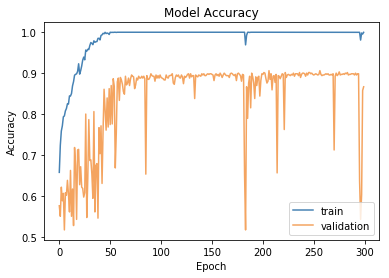

In [17]:
# Show Model Accuracy on Train and Valiadtion Data
plt.plot(train.history['acc'],color='steelblue')
plt.plot(train.history['val_acc'],color='sandybrown')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [18]:
# load weight
path_weight = './result_alexnet/weights-61.h5'
model.load_weights(path_weight)
print('loading weight complete')

loading weight complete


In [27]:
#if load weight

#test affine
# affine_path = './test_aff_28_5/'

#test no affine
# affine_path = './test_noaff_28/'
# affine_path = './test/test_aff_32_-10t10_662/'
affine_path = './test/test_aff_32_-30t30_662/'
predict_data = create_list(affine_path)

Creating image array, processing 100.00%
(662, 1024)
(662,)


In [28]:
(predict_x, predict_y) = (predict_data[0],predict_data[1])

#Convert 0-255 to 0-1
predict_x = predict_x/255.0


#One hot encoding
predict_y = np_utils.to_categorical(predict_y, nb_classes)

#reshape
predict_x = predict_x.reshape(predict_x.shape[0],img_row, img_col, 1)
predict_x = predict_x.astype('float32')


print("Prepare data complete.")

Prepare data complete.


In [29]:
results_affine = model.predict(predict_x)

In [30]:
data_label = ['normal', 'tuberculosis']
def convert_to_label(data):
    max_prob = max(data)
    for i,prob in enumerate(data):
        if prob == max_prob:
            class_index = i
          
    class_label = data_label[class_index]
    return class_label

def image_show(x_test, input_y_test, index):
    pass


def show_test_result(i, results):
    return "Prediction :" + convert_to_label(results[i])
    #image_show(x_test,input_y_test,i)

In [31]:
#Accuracy
correct = 0
total = predict_y.shape[0]

for i in range(results_affine.shape[0]):
    if convert_to_label(results_affine[i]) == convert_to_label(predict_y[i]):
        correct += 1
#     print(show_test_result(i), "Actual :", convert_to_label(predict_y[i]), i)
#     print(show_test_result(i), "Actual :", convert_to_label(predict_y[i]), i)

print('Accuracy : %.2f%%' %((correct/total)*100))

Accuracy : 74.17%


In [32]:
# recall or sensitivity
sum_tb_recall = 0
total = predict_y.shape[0]
sum_tb_correct = 0
for i in range(results_affine.shape[0]):
    if convert_to_label(predict_y[i]) == 'tuberculosis':
        sum_tb_recall += 1
        if convert_to_label(results_affine[i]) == convert_to_label(predict_y[i]):
              sum_tb_correct += 1
        print(show_test_result(i, results_affine), "Actual :", convert_to_label(predict_y[i]), i)
#     print(show_test_result(i), "Actual :", convert_to_label(predict_y[i]), i)


print('recall : %.2f%%' %((sum_tb_correct/sum_tb_recall)*100))

Prediction :normal Actual : tuberculosis 360
Prediction :normal Actual : tuberculosis 361
Prediction :tuberculosis Actual : tuberculosis 362
Prediction :tuberculosis Actual : tuberculosis 363
Prediction :tuberculosis Actual : tuberculosis 364
Prediction :normal Actual : tuberculosis 365
Prediction :tuberculosis Actual : tuberculosis 366
Prediction :tuberculosis Actual : tuberculosis 367
Prediction :tuberculosis Actual : tuberculosis 368
Prediction :tuberculosis Actual : tuberculosis 369
Prediction :normal Actual : tuberculosis 370
Prediction :normal Actual : tuberculosis 371
Prediction :tuberculosis Actual : tuberculosis 372
Prediction :tuberculosis Actual : tuberculosis 373
Prediction :tuberculosis Actual : tuberculosis 374
Prediction :tuberculosis Actual : tuberculosis 375
Prediction :tuberculosis Actual : tuberculosis 376
Prediction :tuberculosis Actual : tuberculosis 377
Prediction :tuberculosis Actual : tuberculosis 378
Prediction :tuberculosis Actual : tuberculosis 379
Prediction

Prediction :normal Actual : tuberculosis 562
Prediction :tuberculosis Actual : tuberculosis 563
Prediction :tuberculosis Actual : tuberculosis 564
Prediction :normal Actual : tuberculosis 565
Prediction :normal Actual : tuberculosis 566
Prediction :tuberculosis Actual : tuberculosis 567
Prediction :tuberculosis Actual : tuberculosis 568
Prediction :tuberculosis Actual : tuberculosis 569
Prediction :normal Actual : tuberculosis 570
Prediction :normal Actual : tuberculosis 571
Prediction :tuberculosis Actual : tuberculosis 572
Prediction :normal Actual : tuberculosis 573
Prediction :normal Actual : tuberculosis 574
Prediction :normal Actual : tuberculosis 575
Prediction :tuberculosis Actual : tuberculosis 576
Prediction :normal Actual : tuberculosis 577
Prediction :normal Actual : tuberculosis 578
Prediction :normal Actual : tuberculosis 579
Prediction :tuberculosis Actual : tuberculosis 580
Prediction :tuberculosis Actual : tuberculosis 581
Prediction :tuberculosis Actual : tuberculosis

In [33]:
#specification
sum_tb_specificity = 0
total = predict_y.shape[0]
sum_n_correct = 0
for i in range(results_affine.shape[0]):
    if convert_to_label(predict_y[i]) == 'normal':
        sum_tb_specificity += 1
        if convert_to_label(results_affine[i]) == convert_to_label(predict_y[i]):
              sum_n_correct += 1
        print(show_test_result(i, results_affine), "Actual :", convert_to_label(predict_y[i]), i)
#     print(show_test_result(i), "Actual :", convert_to_label(y_test[i]), i)


print('specificity : %.2f%%' %((sum_n_correct/sum_tb_specificity)*100))

Prediction :normal Actual : normal 0
Prediction :tuberculosis Actual : normal 1
Prediction :tuberculosis Actual : normal 2
Prediction :normal Actual : normal 3
Prediction :normal Actual : normal 4
Prediction :normal Actual : normal 5
Prediction :tuberculosis Actual : normal 6
Prediction :tuberculosis Actual : normal 7
Prediction :tuberculosis Actual : normal 8
Prediction :normal Actual : normal 9
Prediction :normal Actual : normal 10
Prediction :normal Actual : normal 11
Prediction :tuberculosis Actual : normal 12
Prediction :normal Actual : normal 13
Prediction :normal Actual : normal 14
Prediction :normal Actual : normal 15
Prediction :normal Actual : normal 16
Prediction :normal Actual : normal 17
Prediction :normal Actual : normal 18
Prediction :normal Actual : normal 19
Prediction :normal Actual : normal 20
Prediction :tuberculosis Actual : normal 21
Prediction :normal Actual : normal 22
Prediction :tuberculosis Actual : normal 23
Prediction :normal Actual : normal 24
Prediction :

Prediction :normal Actual : normal 273
Prediction :normal Actual : normal 274
Prediction :normal Actual : normal 275
Prediction :normal Actual : normal 276
Prediction :normal Actual : normal 277
Prediction :normal Actual : normal 278
Prediction :normal Actual : normal 279
Prediction :normal Actual : normal 280
Prediction :normal Actual : normal 281
Prediction :normal Actual : normal 282
Prediction :normal Actual : normal 283
Prediction :normal Actual : normal 284
Prediction :normal Actual : normal 285
Prediction :normal Actual : normal 286
Prediction :normal Actual : normal 287
Prediction :normal Actual : normal 288
Prediction :normal Actual : normal 289
Prediction :normal Actual : normal 290
Prediction :normal Actual : normal 291
Prediction :normal Actual : normal 292
Prediction :normal Actual : normal 293
Prediction :normal Actual : normal 294
Prediction :normal Actual : normal 295
Prediction :normal Actual : normal 296
Prediction :normal Actual : normal 297
Prediction :tuberculosis 

In [34]:
print('Accuracy : %.2f%%' %((correct/total)*100))
print('recall : %.2f%%' %((sum_tb_correct/sum_tb_recall)*100))
print('specificity : %.2f%%' %((sum_n_correct/sum_tb_specificity)*100))

Accuracy : 74.17%
recall : 65.56%
specificity : 81.39%
